In [1]:
#Importing Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#loadind dataset
data = pd.read_csv('Copy of Regrerssion_energy_production_data (2).csv',sep=';')

In [3]:
# Display the first few rows of the data
data.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [4]:
# Get the shape of the data (rows, columns)
data.shape

(9568, 5)

In [5]:
# Get basic information about the data (data types, missing values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [6]:
# Get descriptive statistics of the data
data.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
# Check for missing values
data.isnull().sum()

,0
temperature,0
exhaust_vacuum,0
amb_pressure,0
r_humidity,0
energy_production,0


There is no missing values

In [8]:
#checking for duplicated values
data.duplicated().sum()

41

There is 41 duplucated values

In [9]:
#Dropping duplicated values
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

0

so we removed duplicated values

# Univariate Analysis

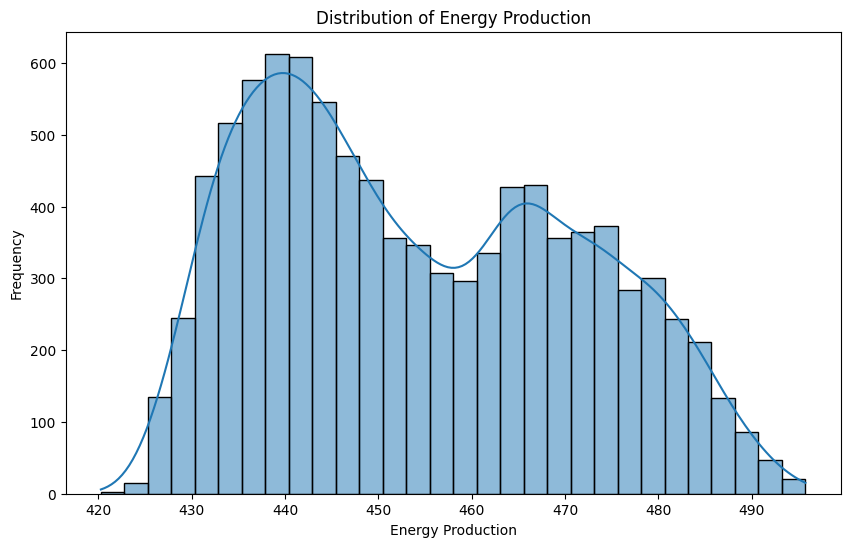

In [11]:
# Visualize the distribution of the target variable (energy_production)
plt.figure(figsize=(10, 6))
sns.histplot(data['energy_production'], bins=30, kde=True)
plt.title('Distribution of Energy Production')
plt.xlabel('Energy Production')
plt.ylabel('Frequency')
plt.show()



*   Histograms:




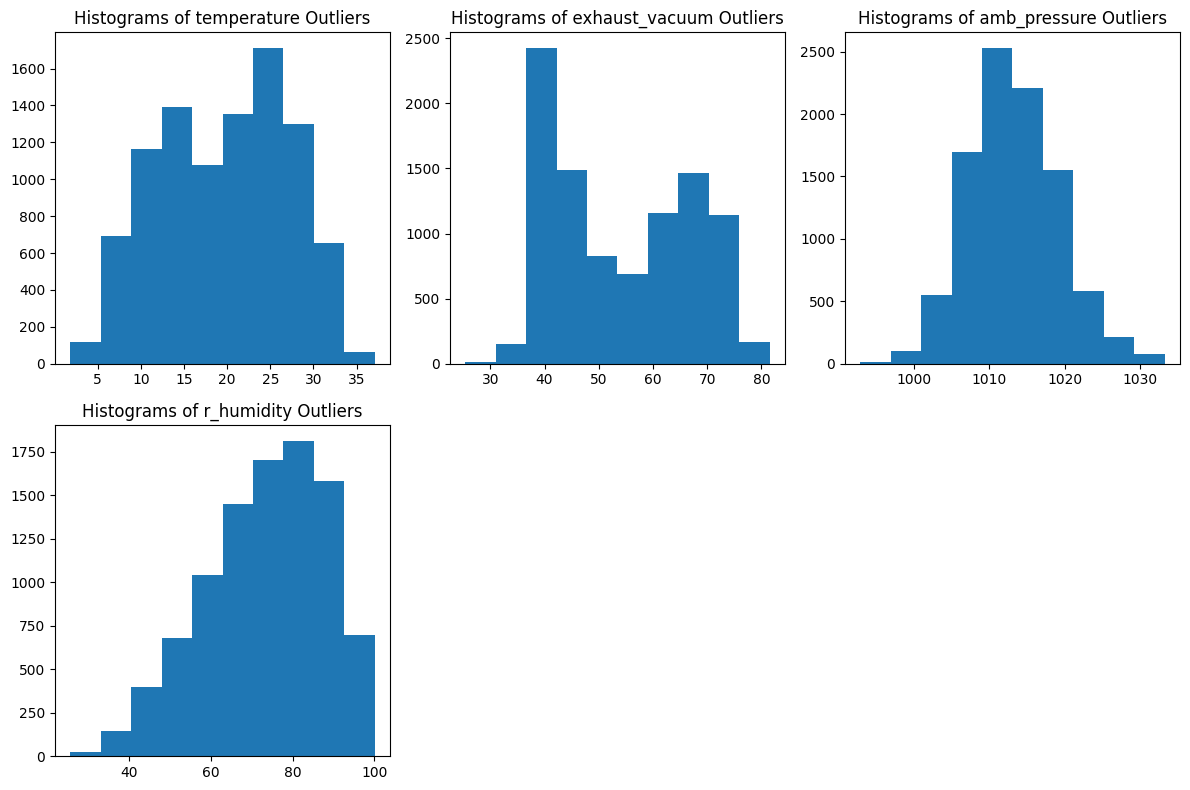

In [12]:
#Display the Histograms for each numerical column

plt.figure(figsize=(12, 8))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    plt.hist(x=data[col])
    plt.title(f'Histograms of {col} Outliers')
plt.tight_layout()
plt.show()



*   Box plots:




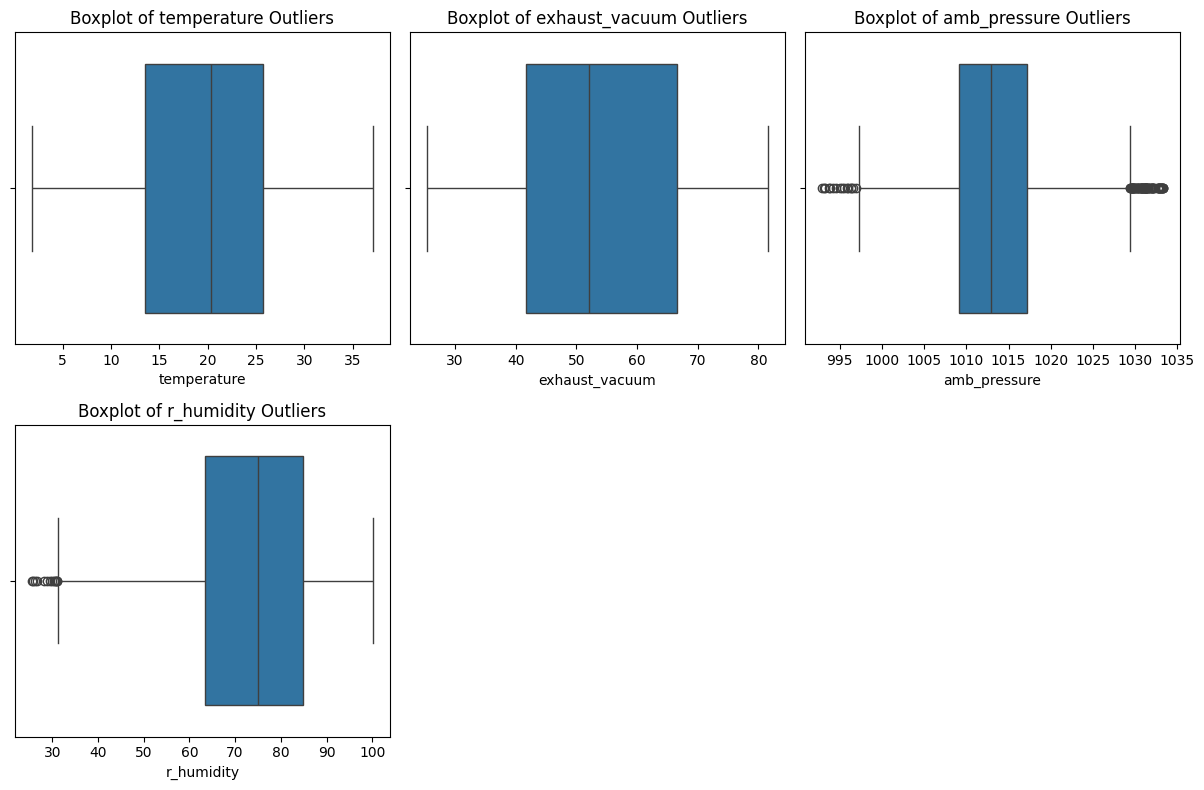

In [13]:
# Display the boxplot for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col} Outliers')
plt.tight_layout()
plt.show()

In [14]:
# Identify and remove outliers for each numerical column
for col in data.columns[:-1]:  # Exclude the target variable
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify and print outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Outliers in {col}:")
    print(outliers)

    # Drop outliers from the DataFrame
    df = data.drop(outliers.index)

Outliers in temperature:
Empty DataFrame
Columns: [temperature, exhaust_vacuum, amb_pressure, r_humidity, energy_production]
Index: []
Outliers in exhaust_vacuum:
Empty DataFrame
Columns: [temperature, exhaust_vacuum, amb_pressure, r_humidity, energy_production]
Index: []
Outliers in amb_pressure:
      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
38           9.95           41.82       1033.09       69.44             477.52
175          9.06           41.92       1029.90       90.88             473.37
315         14.46           42.86       1031.34       69.84             464.44
319         14.58           41.92       1030.42       61.96             462.69
385         14.20           42.86       1031.96       69.59             468.63
...           ...             ...           ...         ...                ...
9093         9.42           41.40       1030.38       87.80             472.99
9125         7.66           41.92       1031.96       82.48          

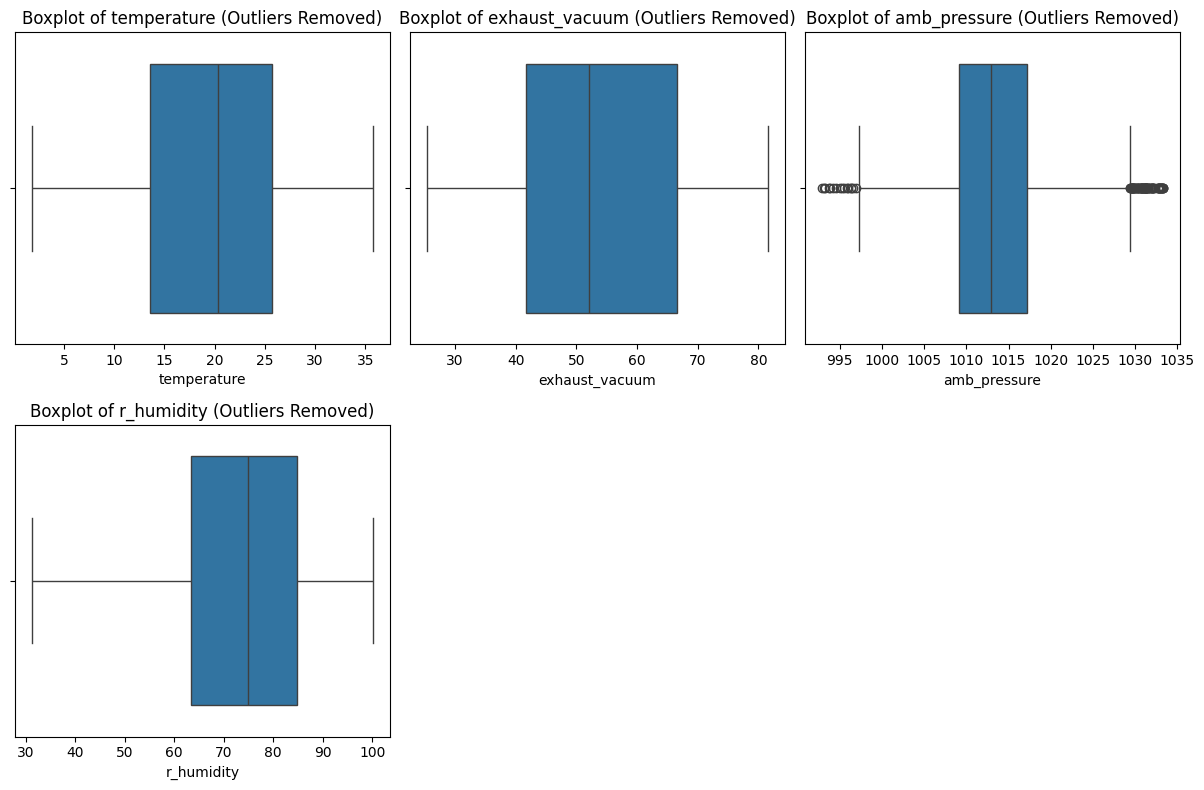

In [15]:
# Boxplot for each numerical column after removing outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (Outliers Removed)')
plt.tight_layout()
plt.show()

Due to the amb_pressure having higher values we should change the IQR Value according to it

deciding whether to delete or modify the outliers requires careful consideration
 our amb_pressure have 30% outliers so lets modify the data rather than the deleting
 because it may contains the valuable information

In [16]:
# Calculate the IQR
iqr = np.percentile(df["amb_pressure"], 75) - np.percentile(df["amb_pressure"], 25)

# Define the threshold values
lower_bound = np.median(df["amb_pressure"]) - 1.5 * iqr
upper_bound = np.median(df["amb_pressure"]) + 1.5 * iqr

# Replace outliers with threshold values
df["amb_pressure"] = np.clip(df["amb_pressure"], lower_bound, upper_bound)

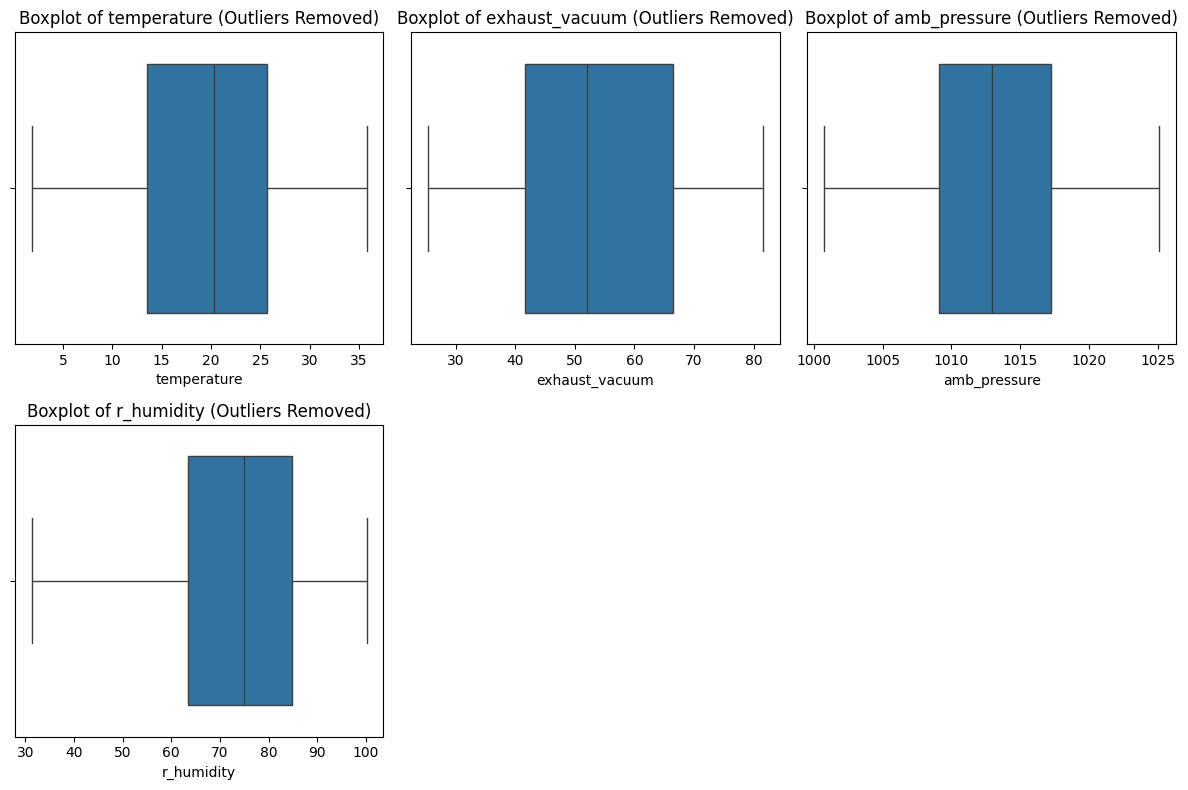

In [17]:
#lets again check the oultiers for our modified data
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (Outliers Removed)')
plt.tight_layout()
plt.show()

outliers have cleared

# Bivariate analysis

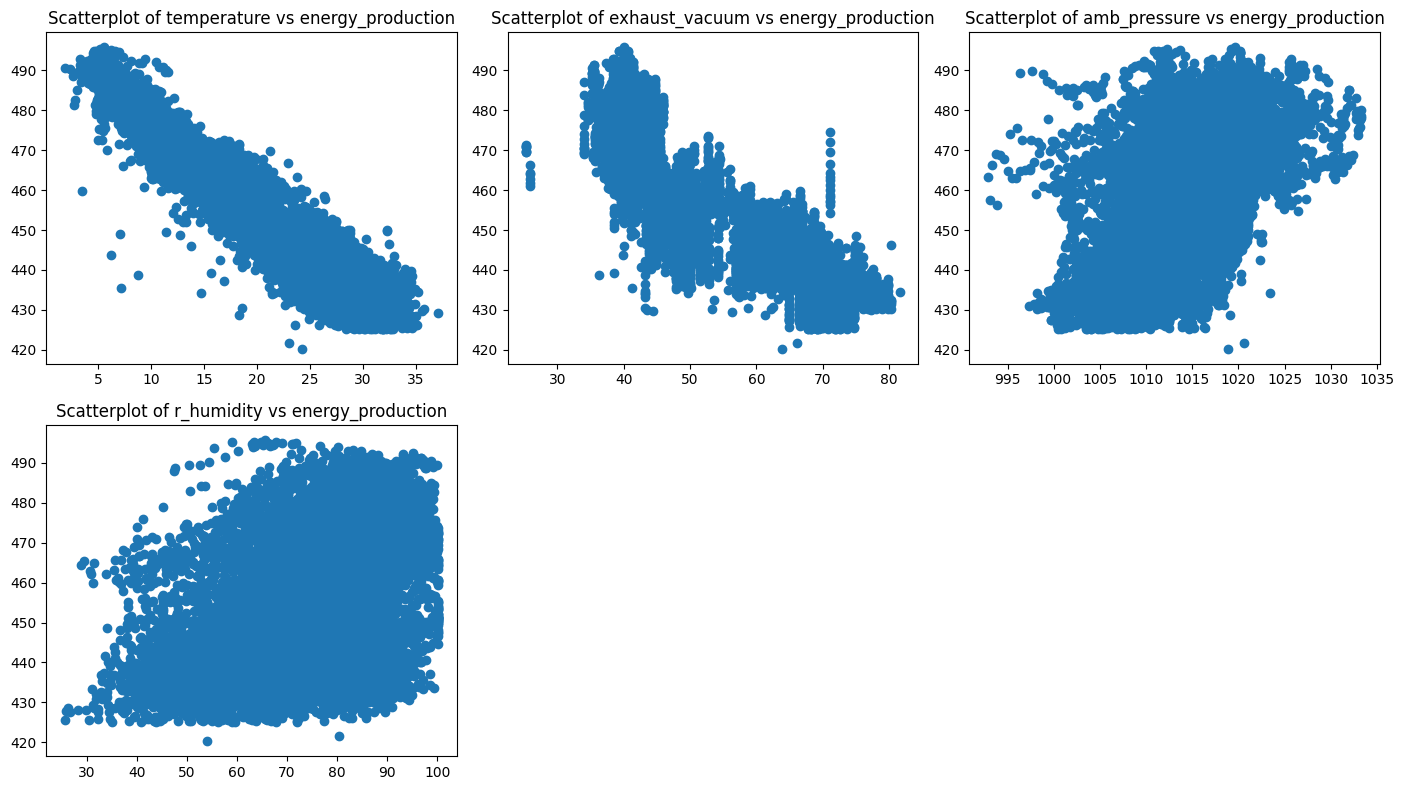

In [18]:
# Display the Scatterplot for each numerical column
plt.figure(figsize=(14, 8))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    plt.scatter(data[col], data['energy_production'])
    plt.title(f'Scatterplot of {col} vs energy_production')

plt.tight_layout()
plt.show()

# **Correlation matrix and heatmap:**

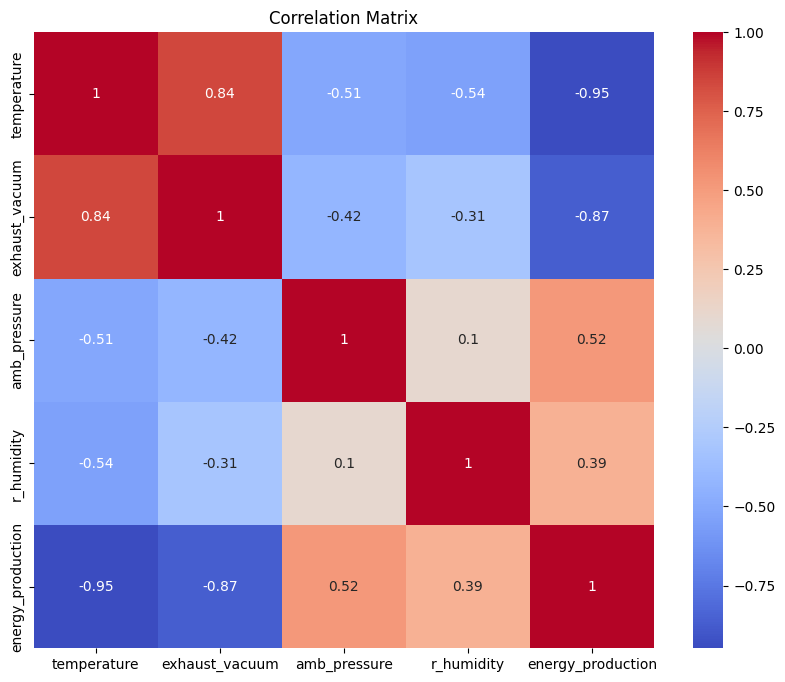

In [19]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Multivariate Analysis

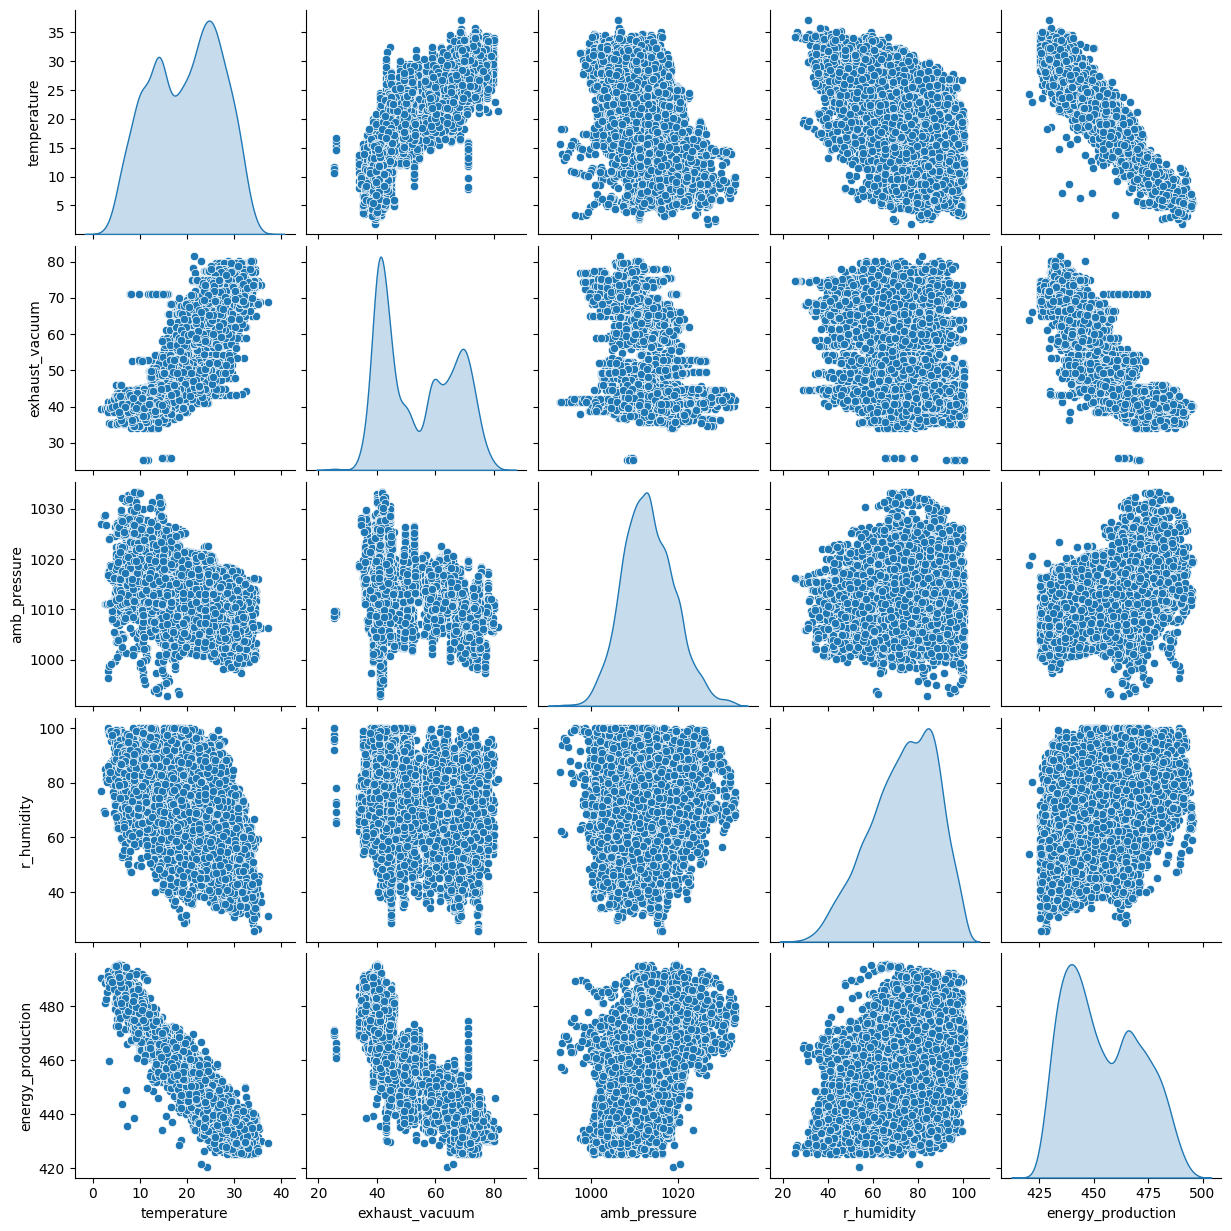

In [20]:
sns.pairplot(data,diag_kind="kde")
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#assign the feature variable and target variable
y=df['energy_production']
y

,energy_production
0,481.30
1,465.36
2,465.48
3,467.05
4,463.58
...,...
9563,457.32
9564,446.92
9565,429.34
9566,421.57


In [23]:
x=df.drop('energy_production',axis=1)
x

,temperature,exhaust_vacuum,amb_pressure,r_humidity
0,9.59,38.56,1017.01,60.10
1,12.04,42.34,1019.72,94.67
2,13.87,45.08,1024.42,81.69
3,13.72,54.30,1017.89,79.08
4,15.14,49.64,1023.78,75.00
...,...,...,...,...
9563,17.10,49.69,1005.53,81.82
9564,24.73,65.34,1015.42,52.80
9565,30.44,56.24,1005.19,56.24
9566,23.00,66.05,1020.61,80.29


In [24]:
# standardize features
ss=StandardScaler()
ss_x=ss.fit_transform(x)
ss_x

array([[-1.35224231, -1.23972361,  0.67490435, -0.91546919],
       [-1.02274514, -0.94163873,  1.15157194,  1.46481671],
       [-0.77663092, -0.72556663,  1.97826483,  0.57109062],
       ...,
       [ 1.4518459 ,  0.15449348, -1.40414031, -1.18124598],
       [ 0.45125039,  0.92809471,  1.30811592,  0.47469489],
       [-0.25481498, -0.39672696,  1.35208894, -0.66966009]])

# Model Evaluation

### 1) Linear Regression

In [25]:
rmse_test=[]# root mean square
rmse_train=[]
r2=[]# r_square
for i in range(100):
    #split the data into training and testing sets
    x_train,x_test,y_train,y_test=train_test_split(ss_x,y,test_size=0.30,random_state=i)

    #create and train the model
    linear_reg=LinearRegression()
    linear_reg.fit(x_train,y_train)

    # make predictions
    y_pred_test=linear_reg.predict(x_test)
    y_pred_train=linear_reg.predict(x_train)

    # Evaluate the model
    rmse_test.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
    rmse_train.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    r2.append(r2_score(y_test,y_pred_test))


In [26]:
print("average of rmse testing :",np.mean(rmse_test))
print("average of rmse training :",np.mean(rmse_train))
print("average of r^2 score :",np.mean(r2))

average of rmse testing : 4.560301318951277
average of rmse training : 4.557758062822112
average of r^2 score : 0.9282297279259919


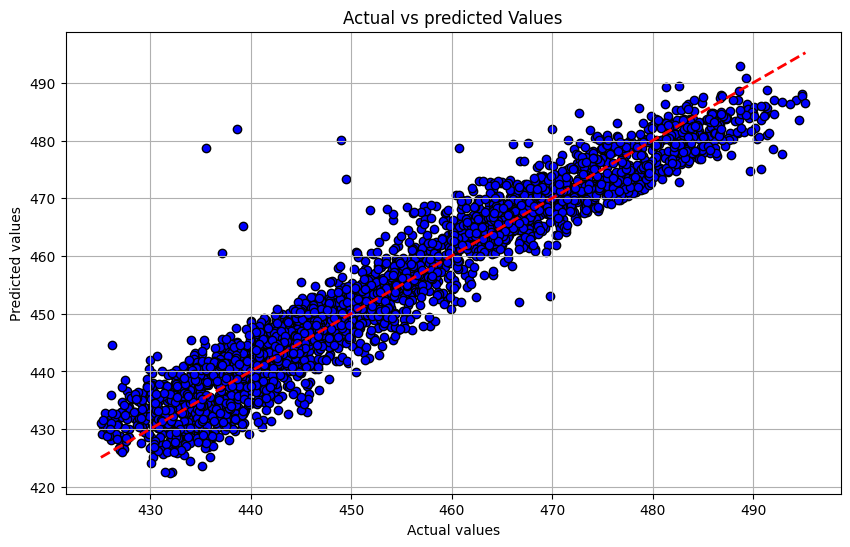

In [27]:
#create a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_test,color='blue',edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],linestyle='--',color='red',linewidth=2)
plt.title('Actual vs predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

### 2) Decisiontree Regressor


In [28]:
rmse_dtr=[]
r2_dtr=[]
for i in range(100):
    #split the data into training and testing sets
    x_train,x_test,y_train,y_test=train_test_split(ss_x,y,test_size=0.30,random_state=i)

    #create and train the model
    dtr_reg=DecisionTreeRegressor()
    dtr_reg.fit(x_train,y_train)

    # make predictions
    y_pred_dtr=dtr_reg.predict(x_test)

    # Evaluate the model
    rmse_dtr.append(np.sqrt(mean_squared_error(y_test,y_pred_dtr)))
    r2_dtr.append(r2_score(y_test,y_pred_dtr))

In [29]:
print('average rmse value of Decison tree regressor :',np.mean(rmse_dtr))
print('average r2_score value of Decison tree regressor :',np.mean(r2_dtr))

average rmse value of Decison tree regressor : 4.636998803980387
average r2_score value of Decison tree regressor : 0.925750131876234


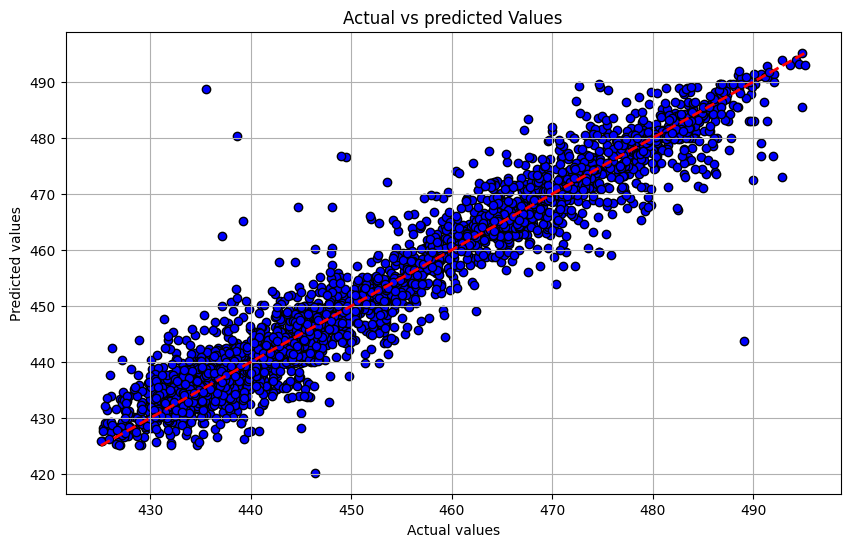

In [30]:
#create a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_dtr,color='blue',edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],linestyle='--',color='red',linewidth=2)
plt.title('Actual vs predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

### 3) Gradient Boosting Regressor


In [31]:
rmse_gb=[]
r2_gb=[]
for i in range(100):
    #split the data into training and testing sets
    x_train,x_test,y_train,y_test=train_test_split(ss_x,y,test_size=0.30,random_state=i)

    #create and train the model
    gb_reg=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_features=0.7)
    gb_reg.fit(x_train,y_train)

    # make predictions
    y_pred_gb=gb_reg.predict(x_test)

    # Evaluate the model
    rmse_gb.append(np.sqrt(mean_squared_error(y_test,y_pred_gb)))
    r2_gb.append(r2_score(y_test,y_pred_gb))

In [32]:
print('average rmse value of Gradient Boosting regressor :',np.mean(rmse_gb))
print('average r2_score value of Gradient Boosting regressor :',np.mean(r2_gb))

average rmse value of Gradient Boosting regressor : 3.928283632248876
average r2_score value of Gradient Boosting regressor : 0.9467317847200475


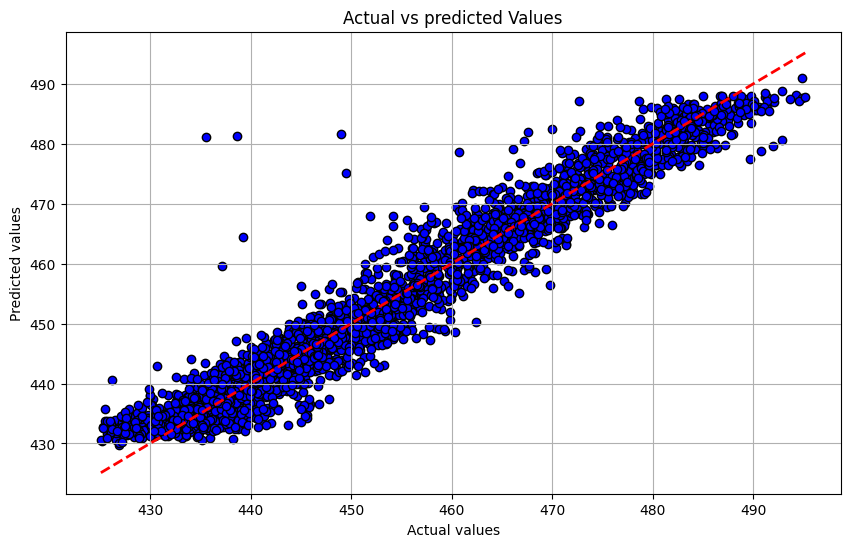

In [33]:
#create a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_gb,color='blue',edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],linestyle='--',color='red',linewidth=2)
plt.title('Actual vs predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

### 4)Support vector Regressor


In [ ]:
rmse_svr=[]
r2_svr=[]
for i in range(100):
    #split the data into training and testing sets
    x_train,x_test,y_train,y_test=train_test_split(ss_x,y,test_size=0.30,random_state=i)

    #create and train the model
    svr_reg=SVR(kernel='linear')
    svr_reg.fit(x_train,y_train)

    # make predictions
    y_pred_svr=svr_reg.predict(x_test)

    # Evaluate the model
    rmse_svr.append(np.sqrt(mean_squared_error(y_test,y_pred_svr)))
    r2_svr.append(r2_score(y_test,y_pred_svr))

In [35]:
print('average rmse value of Support vector Regressor :',np.mean(rmse_svr))
print('average r2_score value of Support vector Regressor :',np.mean(r2_svr))

average rmse value of Support vector Regressor : 4.576228547923489
average r2_score value of Support vector Regressor : 0.9277256808168368


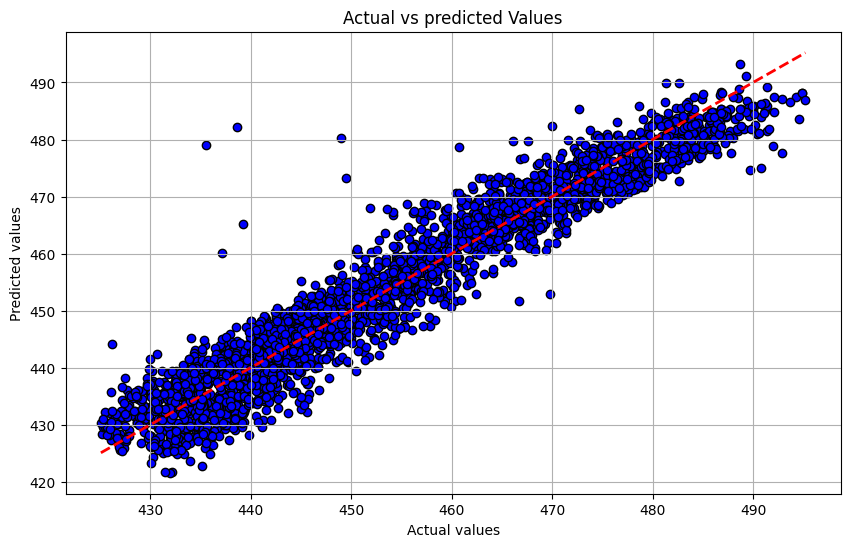

In [36]:
#create a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_svr,color='blue',edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],linestyle='--',color='red',linewidth=2)
plt.title('Actual vs predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

### 5) K-Nearest neighbor


In [37]:
from sklearn.model_selection import GridSearchCV

# Define a range og n_neighbours values to search
n_neighbours={'n_neighbors':[1,3,5,7,9,11]}

# Create the KNN regressor
knn_reg=KNeighborsRegressor()

# Perform grid search with cross-validation
grid_search=GridSearchCV(knn_reg,n_neighbours,cv=5)
grid_search.fit(x_train,y_train)

# Get the best n_neighbours value
best_n_neighbours=grid_search.best_params_['n_neighbors']

print("Best n_neighbours value:",best_n_neighbours)

Best n_neighbours value: 5


In [38]:
rmse_knn=[]
r2_knn=[]
for i in range(100):
    #split the data into training and testing sets
    x_train,x_test,y_train,y_test=train_test_split(ss_x,y,test_size=0.30,random_state=i)

    #create and train the model
    knn_reg=KNeighborsRegressor(n_neighbors=5)
    knn_reg.fit(x_train,y_train)

    # make predictions
    y_pred_knn=knn_reg.predict(x_test)

    # Evaluate the model
    rmse_knn.append(np.sqrt(mean_squared_error(y_test,y_pred_knn)))
    r2_knn.append(r2_score(y_test,y_pred_knn))

In [39]:
print('average rmse value of K-Nearest neighbor Regressor :',np.mean(rmse_knn))
print('average r2_score value of K-Nearest neighbor Regressor :',np.mean(r2_knn))

average rmse value of K-Nearest neighbor Regressor : 3.8672768980982486
average r2_score value of K-Nearest neighbor Regressor : 0.9483737791521599


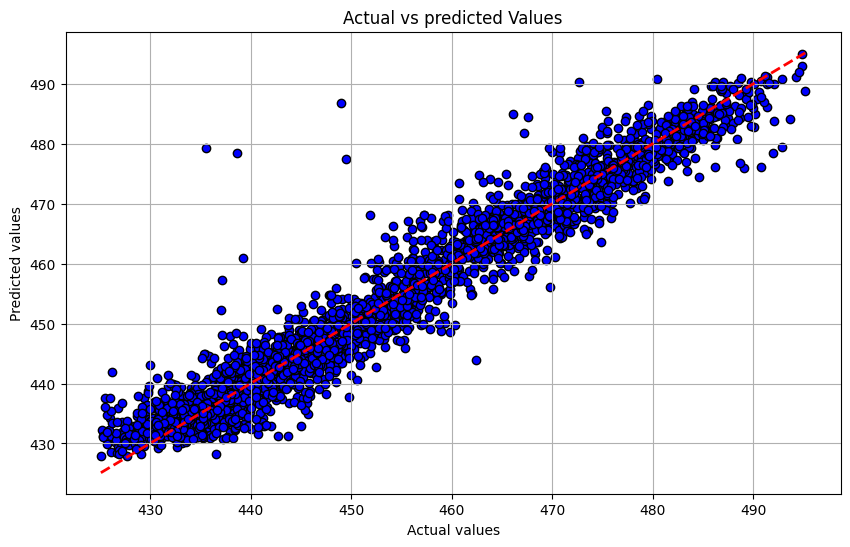

In [40]:
#create a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_knn,color='blue',edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],linestyle='--',color='red',linewidth=2)
plt.title('Actual vs predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

### 6) Random Forest Regressor


In [41]:
# list to store evaluation metrics
rmse_rf=[]
r2_rf=[]
for i in range(100):
    #split the data into training and testing sets
    x_train,x_test,y_train,y_test=train_test_split(ss_x,y,test_size=0.30,random_state=i)

    #create and train the model
    rfr=RandomForestRegressor(n_estimators=100,max_samples=0.6,max_features=0.7)
    rfr.fit(x_train,y_train)

    # make predictions
    y_pred_rf=rfr.predict(x_test)

    # Evaluate the model
    rmse_rf.append(np.sqrt(mean_squared_error(y_test,y_pred_rf)))
    r2_rf.append(r2_score(y_test,y_pred_rf))

In [42]:
print('average rmse value of Random Forest :',np.mean(rmse_rf))
print('average r2_score value of Random Forest :',np.mean(r2_rf))

average rmse value of Random Forest : 3.3629542184244974
average r2_score value of Random Forest : 0.9609442616471106


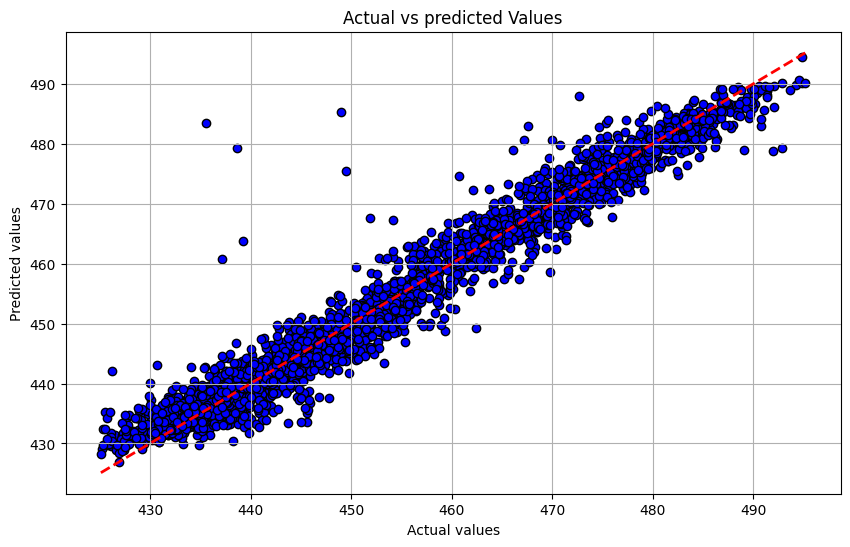

In [43]:
#create a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_rf,color='blue',edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],linestyle='--',color='red',linewidth=2)
plt.title('Actual vs predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

In [44]:
# tabulating the values

table={'Model':pd.Series(['Linear Regression','Decision Tree Regression','Gradient Boosting Regression','Support vector Regression','K-Nearest neighbor Regression','Random Forest']),
      'Average RMSE':pd.Series([np.mean(rmse_test),np.mean(rmse_dtr),np.mean(rmse_gb),np.mean(rmse_svr),np.mean(rmse_knn),np.mean(rmse_rf)]),
       'Average R-squared':pd.Series([np.mean(r2),np.mean(r2_dtr),np.mean(r2_gb),np.mean(r2_svr),np.mean(r2_knn),np.mean(r2_rf)])
     }
Results=pd.DataFrame(table)
Results

,Model,Average RMSE,Average R-squared
0,Linear Regression,4.560301,0.928230
1,Decision Tree Regression,4.636999,0.925750
2,Gradient Boosting Regression,3.928284,0.946732
3,Support vector Regression,4.576229,0.927726
4,K-Nearest neighbor Regression,3.867277,0.948374
5,Random Forest,3.362954,0.960944


In [45]:
Results.sort_values(['Average RMSE','Average R-squared'])

,Model,Average RMSE,Average R-squared
5,Random Forest,3.362954,0.960944
4,K-Nearest neighbor Regression,3.867277,0.948374
2,Gradient Boosting Regression,3.928284,0.946732
0,Linear Regression,4.560301,0.928230
3,Support vector Regression,4.576229,0.927726
1,Decision Tree Regression,4.636999,0.925750


both the Random Forest and K-nearest neighbor models has slightly different r-squared value.So for the best model prediction
we choose Random Forest regressor with more r-squared value and less average rmse value